# Assignment 14_Decision Tree_Company_Data.ipynb

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [4]:
comp= pd.read_csv('Company_Data.csv')
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
comp.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [8]:
comp1=comp.copy()
comp1['Sales_cat'] = pd.cut(x = comp1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
comp1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
label_encoder = preprocessing.LabelEncoder()
comp1['Sales_cat']= label_encoder.fit_transform(comp1['Sales_cat']) 

In [10]:
x=comp1.iloc[:,1:6]
y=comp1['Sales_cat']

In [11]:
x 
pd.set_option("display.max_rows", None) 
x

,CompPrice,Income,Advertising,Population,Price
0,138,73,11,276,120
1,111,48,16,260,83
2,113,35,10,269,80
3,117,100,4,466,97
4,141,64,3,340,128
5,124,113,13,501,72
6,115,105,0,45,108
7,136,81,15,425,120
8,132,110,0,108,124
9,132,113,0,131,124


In [12]:
y

0      0
1      0
2      0
3      2
4      1
5      0
6      2
7      0
8      2
9      1
10     2
11     0
12     1
13     0
14     0
15     2
16     2
17     0
18     0
19     2
20     2
21     0
22     1
23     2
24     0
25     0
26     2
27     1
28     1
29     2
30     0
31     2
32     2
33     2
34     1
35     0
36     2
37     1
38     2
39     1
40     1
41     2
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     2
53     2
54     1
55     2
56     0
57     1
58     2
59     1
60     2
61     2
62     1
63     2
64     2
65     1
66     2
67     2
68     0
69     2
70     0
71     2
72     2
73     0
74     2
75     2
76     0
77     2
78     1
79     2
80     2
81     2
82     0
83     1
84     1
85     2
86     2
87     0
88     2
89     2
90     1
91     1
92     1
93     2
94     2
95     2
96     0
97     2
98     0
99     1
100    1
101    2
102    1
103    1
104    1
105    2
106    1
107    2
108    1
109    2
110    2
1

In [13]:
comp1['Sales_cat'].unique() 

array([0, 2, 1])

In [14]:
comp1.Sales_cat.value_counts()

2    198
0    102
1    100
Name: Sales_cat, dtype: int64

In [15]:
colnames = list(comp.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

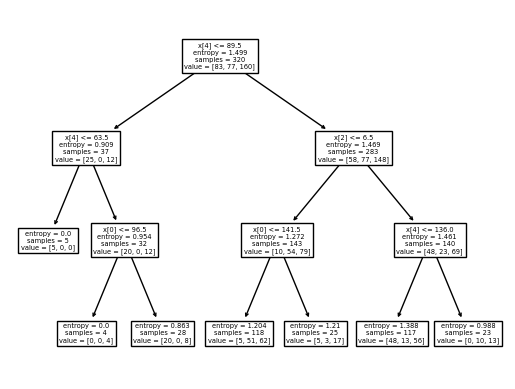

In [18]:
#PLot the decision tree
tree.plot_tree(model);
plt.show()

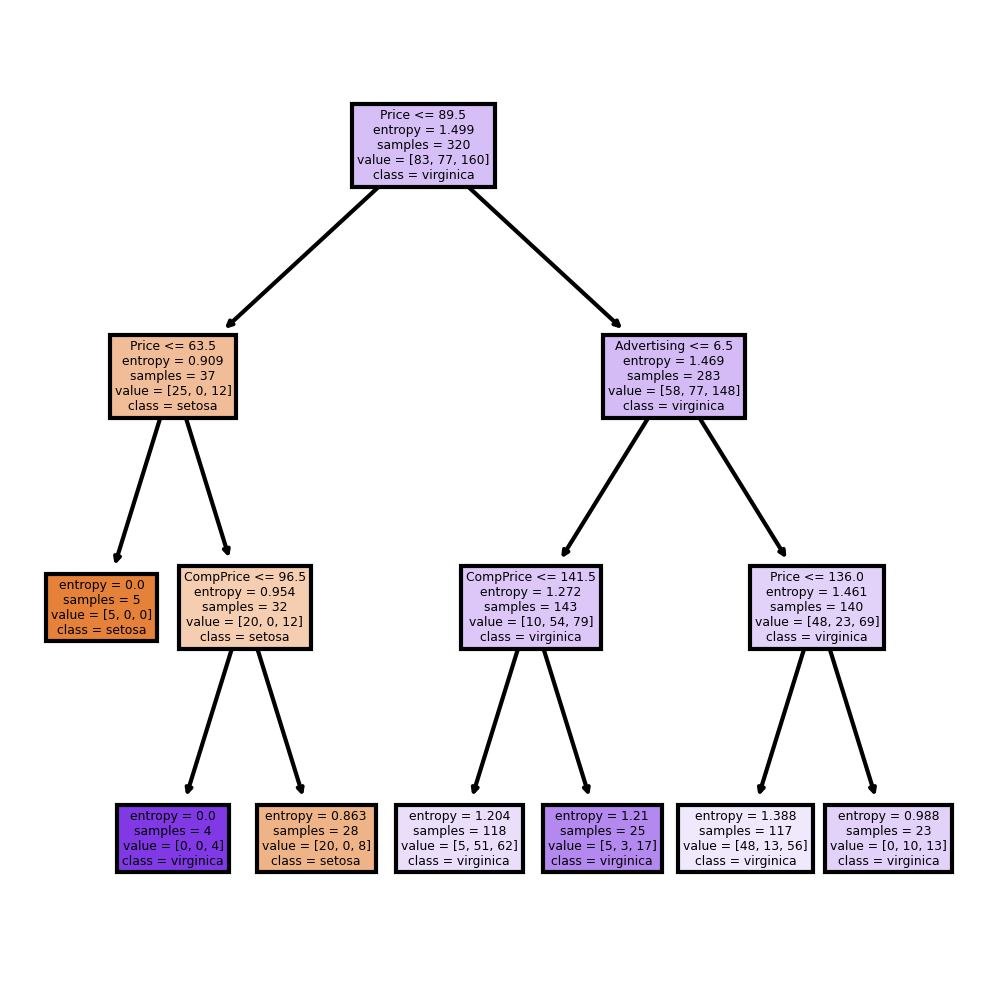

In [19]:
fn=['CompPrice','Income','Advertising','Population','Price']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_4 <= 89.50
|   |--- feature_4 <= 63.50
|   |   |--- class: 0
|   |--- feature_4 >  63.50
|   |   |--- feature_0 <= 96.50
|   |   |   |--- class: 2
|   |   |--- feature_0 >  96.50
|   |   |   |--- class: 0
|--- feature_4 >  89.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_0 <= 141.50
|   |   |   |--- class: 2
|   |   |--- feature_0 >  141.50
|   |   |   |--- class: 2
|   |--- feature_2 >  6.50
|   |   |--- feature_4 <= 136.00
|   |   |   |--- class: 2
|   |   |--- feature_4 >  136.00
|   |   |   |--- class: 2



In [21]:
model.feature_importances_ 

array([0.16215464, 0.        , 0.29804213, 0.        , 0.53980323])

In [22]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.539803
Advertising    0.298042
CompPrice      0.162155
Income         0.000000
Population     0.000000
dtype: float64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

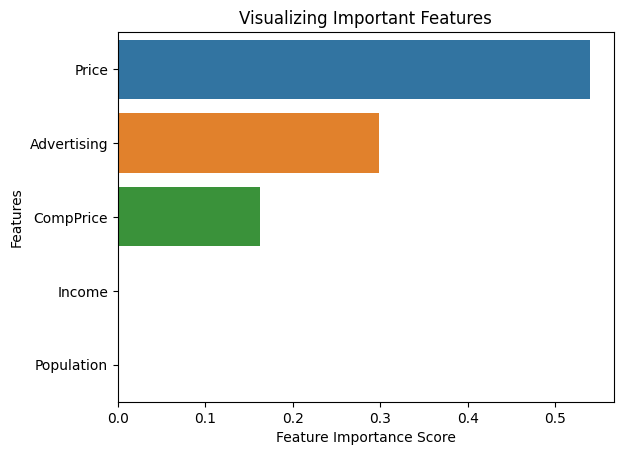

In [24]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [25]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    68
0    12
dtype: int64

In [26]:
preds

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
pd.crosstab(y_test,preds)

col_0,0,2
Sales_cat,,
0,9,10
1,1,22
2,2,36


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.5625

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [30]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.5625

In [32]:
model.feature_importances_ 

array([0.16215464, 0.        , 0.29804213, 0.        , 0.53980323])

In [33]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [34]:
array = comp.values
X = array[:,0:3] 
y = array[:,3] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [36]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [37]:
#Find the testing accuracy
model.score(X_test,y_test)     

-0.08140301003067263

In [38]:
#Find the training accuracy
model.score(X_train, y_train)  

0.23768998912365258